In [1]:
#import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
#Load Dataset
check=pd.read_csv("D:\\zexcelR\\DS Assignments\\Assignment14\\Fraud_check.csv")

In [3]:
check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
check.value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
NO         Divorced        10329           140885           7                YES      1
YES        Married         21966           117250           20               YES      1
                           26679           79683            26               NO       1
                           26741           176050           20               NO       1
                           26793           162777           7                NO       1
                                                                                     ..
NO         Single          22054           91889            16               NO       1
                           22258           63622            17               NO       1
                           23884           111105           8                YES      1
                           24557           32450            19               YES      1
YES        Single          99619     

In [6]:
check.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [7]:
#Fraud_check.loc[check["Taxable.Income"]!="Good","Taxable_Income"]="Risky"
check.loc[check["Taxable.Income"] <= 30000,"Taxable_Income"]="Good"
check.loc[check["Taxable.Income"] > 30001,"Taxable_Income"]="Risky"

In [8]:
check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,68833,50047,10,YES,Risky
1,YES,Divorced,33700,134075,18,YES,Risky
2,NO,Married,36925,160205,30,YES,Risky
3,YES,Single,50190,193264,15,YES,Risky
4,NO,Married,81002,27533,28,NO,Risky
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Risky
596,YES,Divorced,69967,55369,2,YES,Risky
597,NO,Divorced,47334,154058,0,YES,Risky
598,YES,Married,98592,180083,17,NO,Risky


In [9]:
from sklearn import preprocessing 
label_encoder=preprocessing.LabelEncoder()

In [11]:
check['Undergrad']=label_encoder.fit_transform(check['Undergrad'])
check['Marital.Status']=label_encoder.fit_transform(check['Marital.Status'])
check['Urban']=label_encoder.fit_transform(check['Urban'])
check['Taxable_Income']=label_encoder.fit_transform(check['Taxable_Income'])
check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,1
596,1,0,69967,55369,2,1,1
597,0,0,47334,154058,0,1,1
598,1,1,98592,180083,17,0,1


In [12]:
check.drop(['City.Population'],inplace=True,axis=1)
check.drop(['Taxable.Income'],inplace=True,axis=1)
check

,Undergrad,Marital.Status,Work.Experience,Urban,Taxable_Income
0,0,2,10,1,1
1,1,0,18,1,1
2,0,1,30,1,1
3,1,2,15,1,1
4,0,1,28,0,1
...,...,...,...,...,...
595,1,0,7,1,1
596,1,0,2,1,1
597,0,0,0,1,1
598,1,1,17,0,1


In [13]:
#Define x
x=check.iloc[:,0:4]
y=check['Taxable_Income']

In [14]:
x

,Undergrad,Marital.Status,Work.Experience,Urban
0,0,2,10,1
1,1,0,18,1
2,0,1,30,1
3,1,2,15,1
4,0,1,28,0
...,...,...,...,...
595,1,0,7,1
596,1,0,2,1
597,0,0,0,1
598,1,1,17,0


In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable_Income, Length: 600, dtype: int32

In [18]:
#splitting data into training & testing dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=47)

In [19]:
#Build Decision Tree Classifier using Entropy Criteria
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
model.get_n_leaves()

160

In [21]:
#predicting on test dataset
pred=model.predict(x_test)
#getting the count of each category
pd.Series(pred).value_counts()

1    95
0    25
dtype: int64

In [22]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1])

In [27]:
np.mean(pred==y_test)

0.5916666666666667

In [28]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.12      0.16      0.14        25
           1       0.76      0.71      0.73        95

    accuracy                           0.59       120
   macro avg       0.44      0.43      0.44       120
weighted avg       0.63      0.59      0.61       120



In [23]:
#Build Decision Tree classifier classification & regression tree using gini criteria
model_gini=DecisionTreeClassifier(criterion='gini')

In [24]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
model_gini.get_n_leaves()

161

In [26]:
pred=model_gini.predict(x_test)
pd.Series(pred).value_counts()

1    95
0    25
dtype: int64

In [29]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1])

In [30]:
np.mean(pred==y_test)

0.5916666666666667

In [31]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.12      0.16      0.14        25
           1       0.76      0.71      0.73        95

    accuracy                           0.59       120
   macro avg       0.44      0.43      0.44       120
weighted avg       0.63      0.59      0.61       120



In [32]:
#Build Decision Tree Regression

In [35]:
from sklearn.tree import DecisionTreeRegressor
model_R=DecisionTreeRegressor()
model_R.fit(x_train,y_train)

DecisionTreeRegressor()

In [38]:
pred=model_R.predict(x_test)

In [40]:
np.mean(pred==y_test)

0.5083333333333333

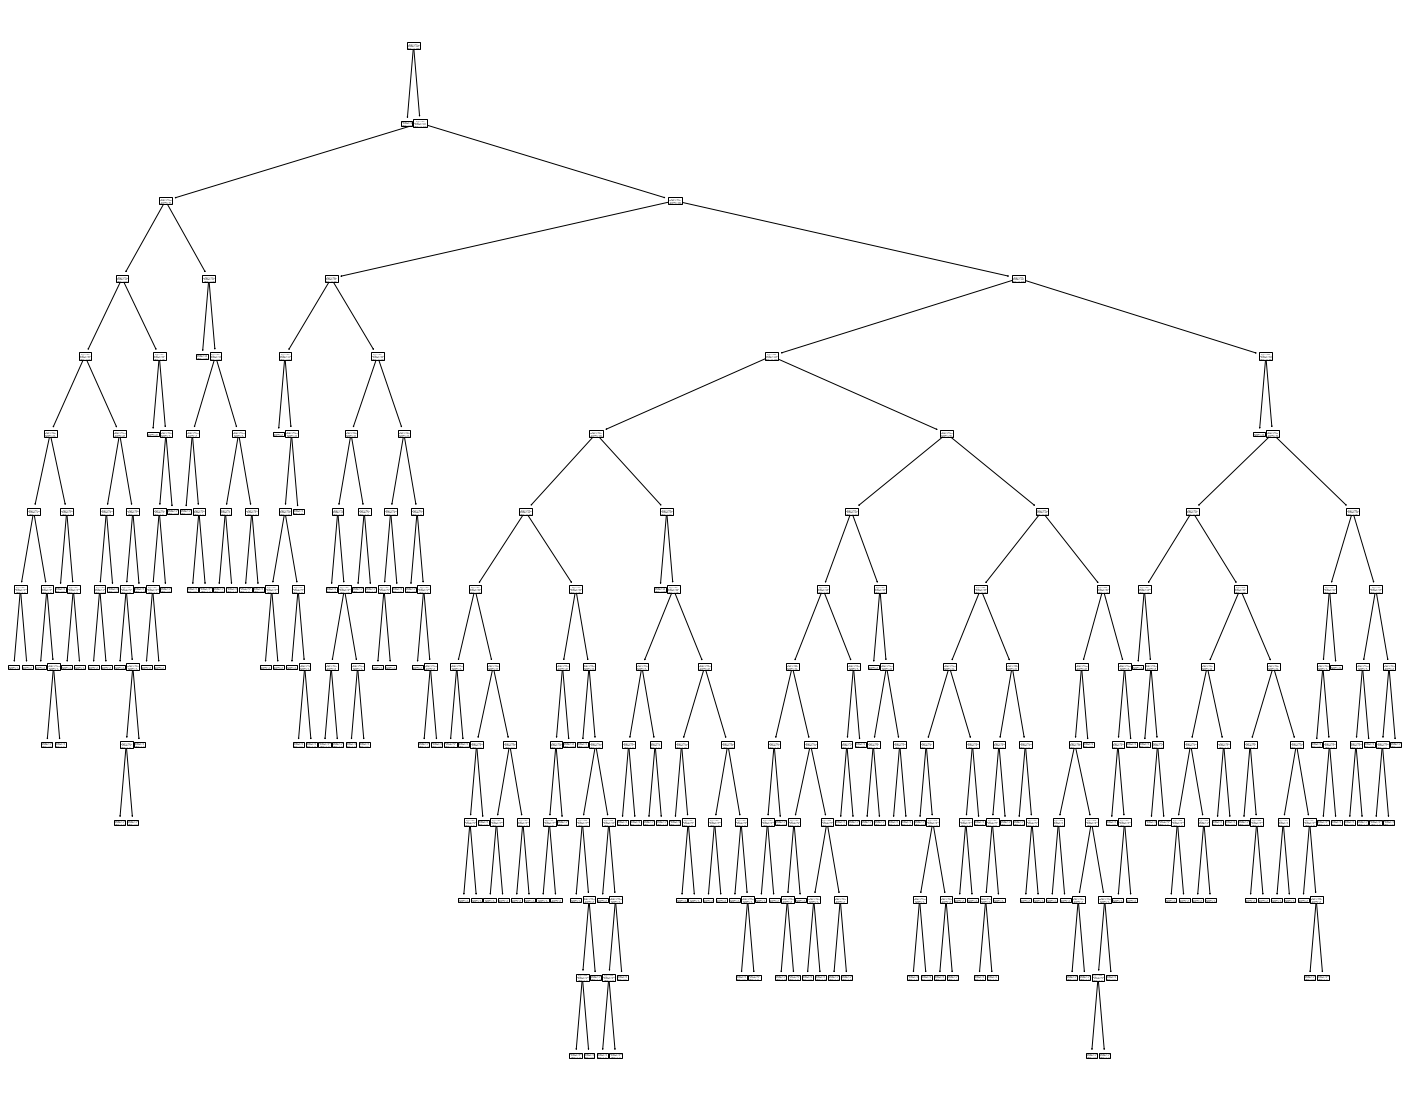

In [42]:
#Plot Tree Diagram
#Decision Tree Classifier using entropy Criteria
fig=plt.figure(figsize=(25,20))
fig=tree.plot_tree(model)

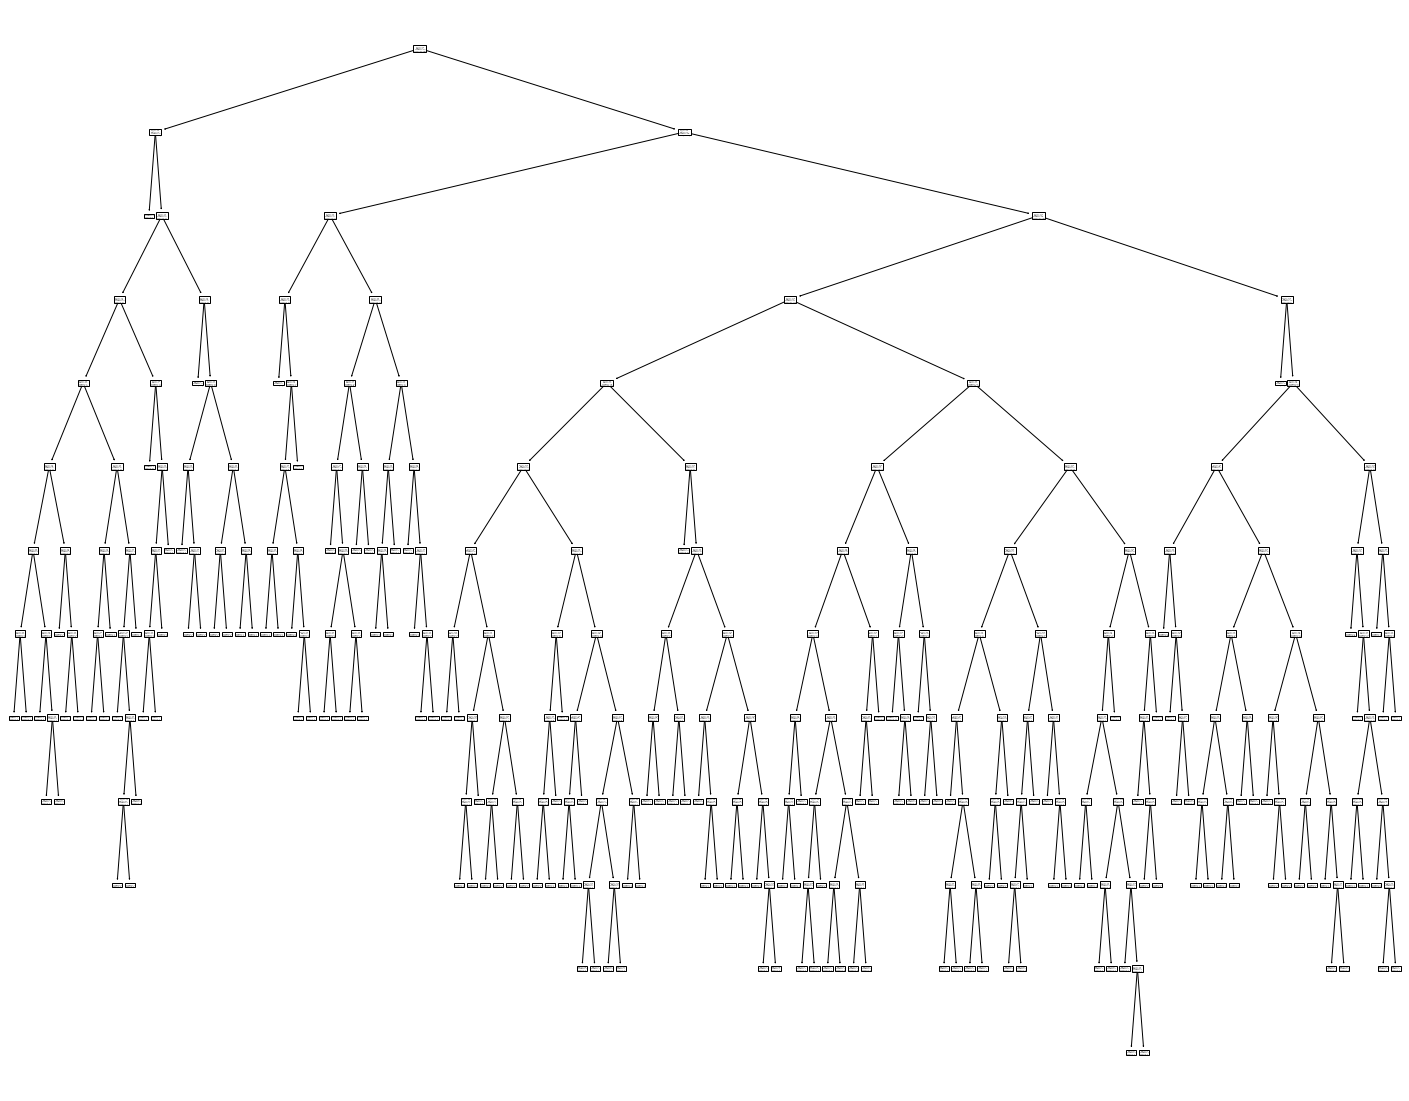

In [43]:
#Decision Tree Classifier using Gini(CART)criteria
fig=plt.figure(figsize=(25,20))
fig=tree.plot_tree(model_gini)

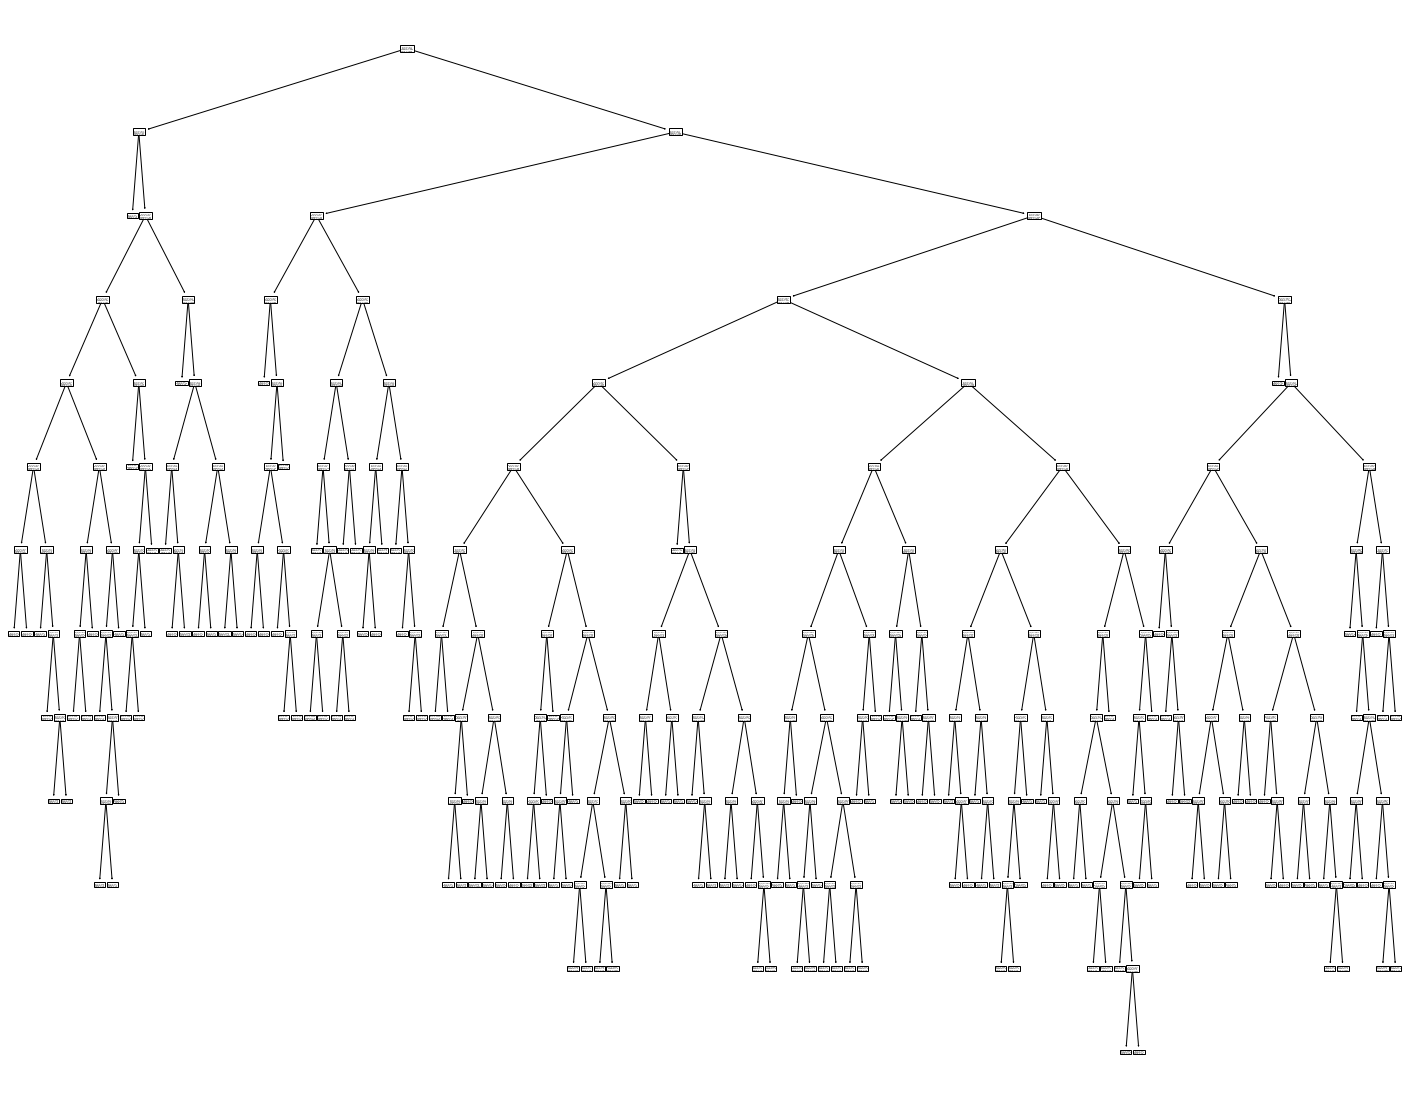

In [44]:
#Decision Tree Regression
fig=plt.figure(figsize=(25,20))
fig=tree.plot_tree(model_R)